In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.strategy import StrategyBase, OptParam, OptParamArray
from backtester.swarms.ranking import SwarmRanker
from backtester.swarms.rebalancing import SwarmRebalance
from backtester.swarms.filters import SwarmFilter
from backtester.costs import CostsManagerEXOFixed
from backtester.exoinfo import EXOInfo
from backtester.swarms.rankingclasses import *
from backtester.swarms.swarm import Swarm


import pandas as pd
import numpy as np
import scipy

In [3]:
from strategies.strategy_bbands import StrategyBollingerBands

In [226]:
from scripts.settings import *
try:
    from scripts.settings_local import *
except:
    pass

from exobuilder.data.exostorage import EXOStorage

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)


exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = '*'  # ES Collars (incl Bearish, Bullish, BW and vanilla)

[print(exo) for exo in storage.exo_list(exo_filter)];

ES_BullishCollarBW
ES_BearishCollarBW
ES_CallSpread
ES_PutSpread
ES_ContFut
ZS_BullishCollarBW
ZS_BearishCollarBW
ZS_CallSpread
ZS_PutSpread
ZS_ContFut
CL_BullishCollarBW
CL_BearishCollarBW
CL_CallSpread
CL_PutSpread
CL_ContFut
ZW_BullishCollarBW
ZW_BearishCollarBW
ZW_CallSpread
ZW_PutSpread
ZW_ContFut
ZN_BullishCollarBW
ZN_BearishCollarBW
ZN_CallSpread
ZN_PutSpread
ZN_ContFut
NG_BullishCollarBW
NG_BearishCollarBW
NG_CallSpread
NG_PutSpread
NG_ContFut
ZC_BullishCollarBW
ZC_BearishCollarBW
ZC_CallSpread
ZC_PutSpread
ZC_ContFut
CL_SMART_Ichimoku_Long
ES_SMART_Ichimoku_Long
NG_SMART_Ichimoku_Long
ZC_SMART_Ichimoku_Long
ZS_SMART_Ichimoku_Long
ZW_SMART_Ichimoku_Long
ZN_SMART_Ichimoku_Long
CL_SMART_Ichimoku_VerticalSpread_Bullish
CL_SMART_Ichimoku_Straddle_Bullish
ES_SMART_Ichimoku_Straddle_Bullish
NG_SMART_Ichimoku_Straddle_Bullish
ZC_SMART_Ichimoku_Straddle_Bullish
ZS_SMART_Ichimoku_Straddle_Bullish
ZW_SMART_Ichimoku_Straddle_Bullish
ZN_SMART_Ichimoku_Straddle_Bullish
CL_SmartEXO_Ichi_Bull

## Script settings

In [453]:
STRATEGY_CONTEXT = {
    'strategy': { 
        'class': StrategyBollingerBands,
        'exo_name': 'CL_SmartEXO_Ichi_Bullish_Straddle_150Delta_ExpHedged_small_BearStraddle', # <---- Select and paste EXO name from cell above ZW_SMART_Ichimoku_Long
        'exo_storage': storage,        
        'opt_params': [
                        #OptParam(name, default_value, min_value, max_value, step)
                        OptParamArray('Direction', [1]),
                        OptParam('BB_Period', 20, 2, 25, 5),
                        OptParam('BB_K', 2, 9, 9, 1),
            
                        ### Trend 0:5
                        OptParamArray('RulesIndex', np.arange(26)[1:2]),
            
                        ### Vola breakout 5:10
                        #OptParamArray('RulesIndex', np.arange(26)[5:10]),
        
                        ### High vola(BBands width percent rank > 80-90) 10:15
                        #OptParamArray('RulesIndex', np.arange(26)[10:11]),
            
                        ### %B rules 15:26
                        #OptParamArray('RulesIndex', np.arange(26)[15:26]),
            
                        ### All rules
                        #OptParamArray('RulesIndex', np.arange(26)[2:8]),
            
                        OptParam('MedianPeriod', 5, 26, 26, 13)
            ],
    },
    'swarm': {
        'members_count': 1,
        'ranking_class': RankerBestWithCorrel(window_size=-1, correl_threshold=0.9),
        'rebalance_time_function': SwarmRebalance.every_friday,

    },
    'costs':{
        'manager': CostsManagerEXOFixed,
        'context': {
            'costs_options': 3.0,
            'costs_futures': 3.0,
        }
    }
}

# Backtest class based strategy

### WARNING! Do not run next block if you want to load swarm from file!

In [454]:
smgr = Swarm(STRATEGY_CONTEXT)
smgr.run_swarm()
smgr.pick()

# Saving results to swarms directory
smgr.save('./swarms/')

### WARNING! Loading swarm from file (don't run next cell if you want new swarm instance)

In [455]:
#smgr = Swarm.load(strategy_context=STRATEGY_CONTEXT, directory='./swarms/')
#print('Loading: '+smgr.get_swarm_name())

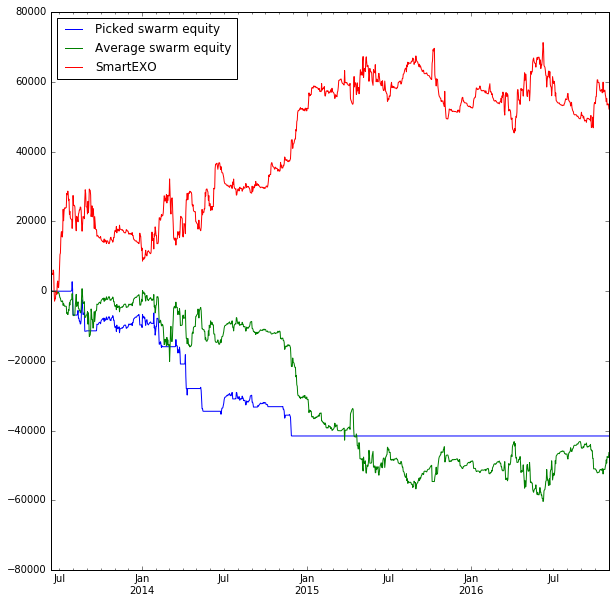

In [456]:
figsize(10,10)
smgr.picked_equity.plot(label='Picked swarm equity');
smgr.raw_equity.plot(label='Average swarm equity');
smgr.strategy.exoinfo.data.exo.plot(label='SmartEXO')
legend(loc=2);

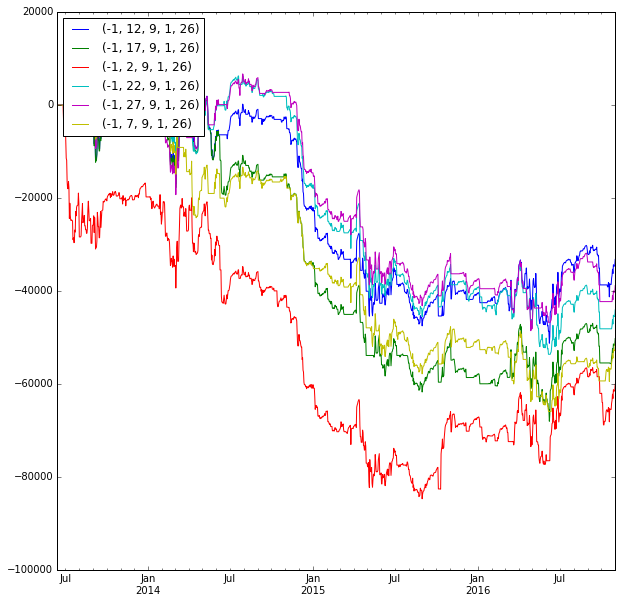

In [457]:
figsize(10,10)
smgr.raw_swarm.plot(legend=True)
legend(loc=2);

In [458]:
#
# To export swarms above to .csv, uncomment this
#

#swarm_df = smgr.swarm
#swarm_df.to_csv('./temp_swarms/ichi_swarm.csv')

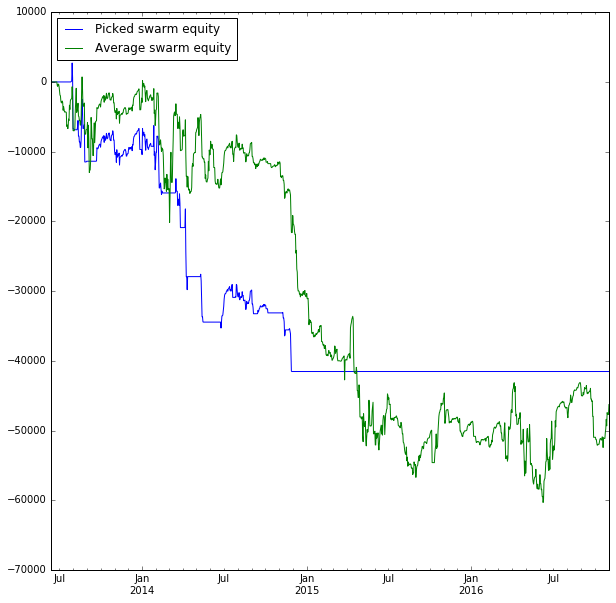

In [459]:
figsize(10,10)
smgr.picked_equity.plot(label='Picked swarm equity');
smgr.raw_equity.plot(label='Average swarm equity');
legend(loc=2);

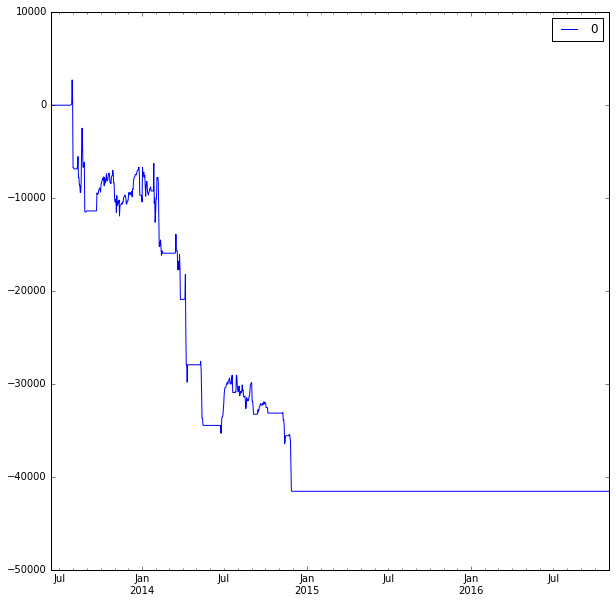

In [460]:
smgr.picked_swarm.plot()

# Swarm exposure

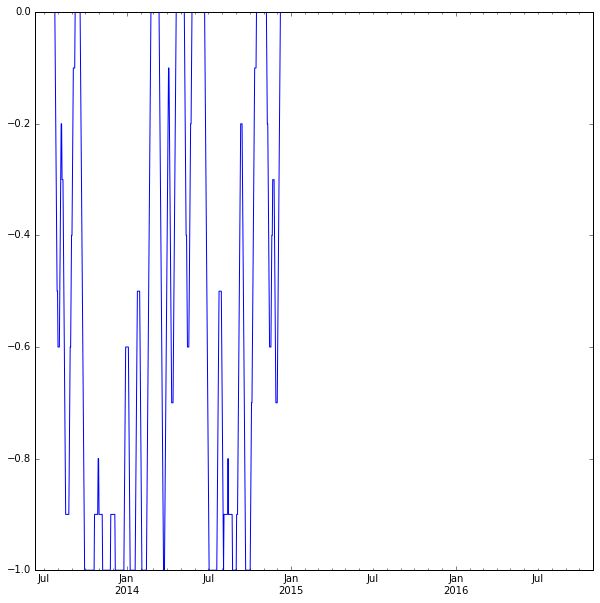

In [461]:
smgr.picked_exposure.sum(axis=1).rolling(10).mean().plot()

# Swarm statistics

#### Non-picked swarm stats

In [462]:
smgr.picked_stats

{'note:Not implemented yet'}

## Exo information

In [463]:
smgr.strategy.exoinfo.exo_info

{'dbdata': {'_id': ObjectId('5818f18520bb1d0dfe6309d4'),
  'calc_date': datetime.datetime(2016, 11, 1, 13, 17, 46, 946000),
  'name': 'CL_SmartEXO_Ichi_Bullish_Straddle_150Delta_ExpHedged_small_BearStraddle',
  'position': {'_realized_pnl': 52229.497176540135,
   'positions': {'203171335': {'leg_name': '',
     'qty': 1.0,
     'value': 934.8038232329934},
    '203179517': {'leg_name': '', 'qty': 0.0, 'value': 0.0},
    '203187415': {'leg_name': 'bearish',
     'qty': 1.0,
     'value': 2024.7377910786922}}},
  'series': b'\x80\x03cpandas.core.frame\nDataFrame\nq\x00)\x81q\x01}q\x02(X\x04\x00\x00\x00_typq\x03X\t\x00\x00\x00dataframeq\x04X\t\x00\x00\x00_metadataq\x05]q\x06X\x05\x00\x00\x00_dataq\x07cpandas.core.internals\nBlockManager\nq\x08)\x81q\t(]q\n(cpandas.indexes.base\n_new_Index\nq\x0bcpandas.indexes.base\nIndex\nq\x0c}q\r(X\x04\x00\x00\x00dataq\x0ecnumpy.core.multiarray\n_reconstruct\nq\x0fcnumpy\nndarray\nq\x10K\x00\x85q\x11C\x01bq\x12\x87q\x13Rq\x14(K\x01K\x02\x85q\x15cnumpy\

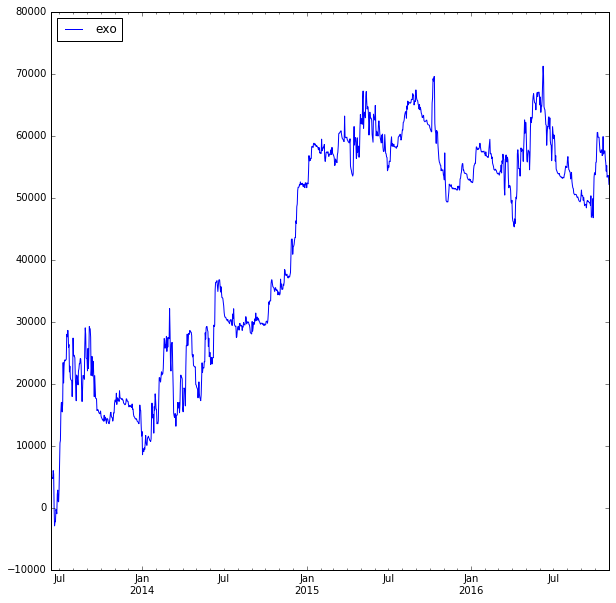

In [464]:
smgr.strategy.exoinfo.data.exo.plot()
legend(loc=2);

### Global filter information (obsolete)


## Costs information (per 1-exo unit)

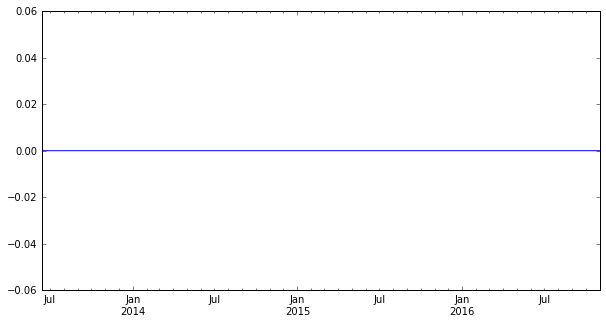

In [465]:
figsize(10,5)
smgr.strategy.costs.plot()

## Margin graphs

### EXO Margin (per 1 EXO unit)

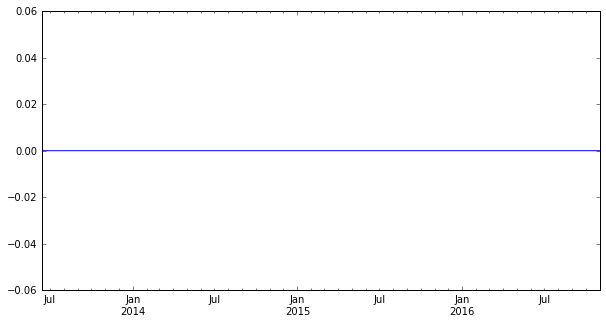

In [466]:
smgr.strategy.exoinfo.margin().plot()

# Saving results

In [467]:
smgr.save('./swarms/')